In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv")

# Select features and target
features = [
    "Brand Score", "Cost Price (cp)", "Selling Price (sp)",
    "Days to Expire", "Demand Factor", "Quantity Left"
]
target = "Discount (%)"

# Drop rows with missing values
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define model and parameter grid
xgb_model = xgb.XGBRegressor(random_state=42)

param_dist = {
    "n_estimators": [500, 1000, 2000],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 6],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 1.5, 2]
}

# Hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="r2",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:")
print(random_search.best_params_)
print(f"\nR2 Score: {r2:.4f}")
print(f"MSE     : {mse:.4f}")

# Display Actual vs Predicted
result_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print("\nActual vs Predicted (sample):")
print(result_df.head(2000).to_string(index=False))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

R2 Score: 0.9998
MSE     : 0.0043

Actual vs Predicted (sample):
 Actual  Predicted
  14.49  14.453366
  12.54  12.487279
   3.60   3.641504
   9.36   9.272212
  14.28  14.252657
  16.98  16.908592
  15.96  15.956280
   9.39   9.294724
   3.63   3.660809
  11.58  11.506418
  16.35  16.305124
   9.45   9.460510
  12.39  12.373589
  21.15  21.229160
   7.23   7.265968
  16.65  16.701691
  15.21  15.084176
  14.19  14.193051
  10.53  10.492065
  17.94  17.911047
  15.24  15.231153
  10.86  10.764526
  23.43  23.342205
  18.63  18.720966
   8.46   8.427336
   7.89   7.934877
  21.90  21.911758
   1.56   1.589154
  19.08  19.160662
   6.06   5.976919
   2.79   2.825015
   9.15   9.193808
  18.48  18.474680
  11.10  11.032860
   8.37   8.359475
  13.62  13.643801
   3.36   3.3870

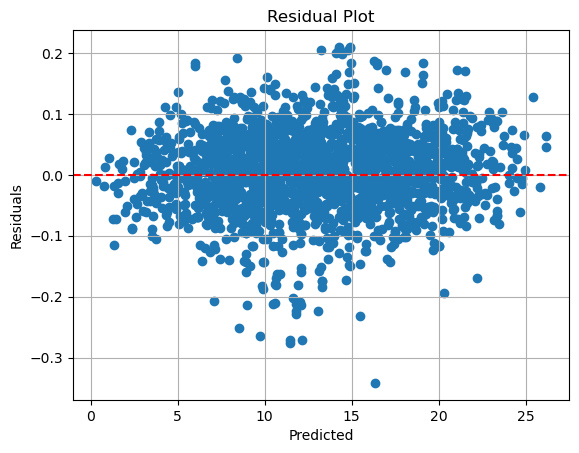

In [35]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


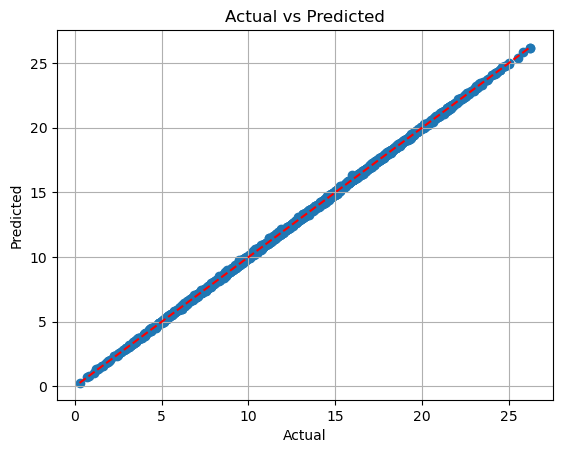

In [37]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()
